In [83]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from shapely.geometry import *
from shapely.ops import *

In [84]:
path=('./done_oct/')

# 1. На вход подаются данные по валидациям, привязанным к остановкам за 3 дня

In [85]:
DATA=pd.read_csv(path+'For_matrix_2019_10_16.csv', sep = ',', encoding='utf-8')
DATA2=pd.read_csv(path+'For_matrix_2019_10_17.csv', sep = ',', encoding='utf-8')
DATA2['time']=DATA2['time']+24*3600 #прибалвяем 24 часа в секундах
DATA3=pd.read_csv(path+'For_matrix_2019_10_18.csv', sep = ',', encoding='utf-8')
DATA3['time']=DATA3['time']+24*3600+24*3600 #прибалвяем 24*2  часа (2 дня) в секундах
DATA=DATA.append(DATA2).append(DATA3)

In [86]:
DATA=DATA[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]

In [87]:
len(DATA)

1248518

In [88]:
DATA['mr_id'].unique()

array([  1,  10,  12,  14,  15,  17,  18,  20,  23,  24,  25,  26,  27,
        28,  30,  31,  32,  34,  35,  36,  37,  38,  39,  43,  44,  45,
        47,  48,  49,  59,  60,  61,  62,  64,  68,  70,  71,  73,  81,
        97,  98,  99, 100, 103, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 126, 127, 129, 130, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 151, 152, 176,
       187, 199,  19, 102], dtype=int64)

In [89]:
subway=pd.read_csv(path+'stops_subway.csv', sep = ';', encoding='utf-8')

In [90]:
subway.head()

,ssId,Станция,ss_lat,ss_long
0,2081,Алабинская,53.209188,50.133092
1,2082,Российская,53.211449,50.149668
2,2083,Московская,53.203067,50.160567
3,2084,Гагаринская,53.200304,50.176584
4,2085,Спортивная,53.200954,50.199017


# 2. Загружаем данные метрополитена (при наличии)

In [91]:
METRO=pd.read_csv(path+'./metro/2019.10.16.csv', sep=',', encoding='windows-1251')
METRO=METRO.merge(subway,on='Станция', how ='left')
METRO['Код Маршрута']='subway'
METRO['mr_id']=0
METRO['rl_id']=0
METRO['rc_orderby']=0
METRO['time']=pd.to_datetime(METRO['Дата и время поездки'])
METRO['hour']=METRO['time'].dt.hour
METRO['min']=METRO['time'].dt.minute
METRO['sec']=METRO['time'].dt.second
METRO['time']=(METRO['hour'].astype(int))*3600+(METRO['min'].astype(int))*60+(METRO['sec'].astype(int))
METRO=METRO.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO=METRO[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]

РАЗМАЗЫВАЕМ 43684 в течение дня

In [92]:
METRO['c']=1+(43684/len(METRO))

In [93]:
METRO2=pd.read_csv(path+'./metro/2019.10.17.csv', sep=',', encoding='windows-1251')
METRO2=METRO2.merge(subway,on='Станция', how ='left')
METRO2['Код Маршрута']='subway'
METRO2['mr_id']=0
METRO2['rl_id']=0
METRO2['rc_orderby']=0
METRO2['time']=pd.to_datetime(METRO2['Дата и время поездки'])
METRO2['hour']=METRO2['time'].dt.hour
METRO2['min']=METRO2['time'].dt.minute
METRO2['sec']=METRO2['time'].dt.second
METRO2['time']=(METRO2['hour'].astype(int))*3600+(METRO2['min'].astype(int))*60+(METRO2['sec'].astype(int))+24*3600
METRO2=METRO2.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO2=METRO2[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]
METRO2['c']=1+(43684/len(METRO2))

In [94]:
len(METRO2)

33682

In [95]:
43684-33682

10002

In [96]:
10002/43684

0.22896254921710466

In [97]:
METRO3=pd.read_csv(path+'./metro/2019.10.18.csv', sep=',', encoding='windows-1251')
METRO3=METRO3.merge(subway,on='Станция', how ='left')
METRO3['Код Маршрута']='subway'
METRO3['mr_id']=0
METRO3['rl_id']=0
METRO3['rc_orderby']=0
METRO3['time']=pd.to_datetime(METRO3['Дата и время поездки'])
METRO3['hour']=METRO3['time'].dt.hour
METRO3['min']=METRO3['time'].dt.minute
METRO3['sec']=METRO3['time'].dt.second
METRO3['time']=(METRO3['hour'].astype(int))*3600+(METRO3['min'].astype(int))*60+(METRO3['sec'].astype(int))+24*3600+24*3600
METRO3=METRO3.drop('hour',axis=1).drop('sec',axis=1).drop('min',axis=1).drop('Терминал',axis=1).drop('NUM_TRIP',axis=1)
METRO3=METRO3[['Дата и время поездки','Номер кристалла','TCAT','Код Маршрута','Код предприятия','mr_id','time','ssId','rl_id','rc_orderby']]
METRO3['c']=1+(43684/len(METRO3))

In [98]:
DATA['c']=1

In [99]:
DATA=DATA.append(METRO).append(METRO2).append(METRO3)

In [100]:
del METRO
del METRO2
del METRO3
del DATA2
del DATA3

In [101]:
len(DATA)

1349420

# 3. Привязываем все валидации к сайтам

In [102]:
sites=pd.read_csv('./done_oct/res/stop_seq_v3.csv', sep = ';', encoding='utf-8')

In [103]:
sites['ssId']=sites['ssId'].astype('str')

In [104]:
DATA['ssId']=DATA['ssId'].astype('str')

In [105]:
sites=sites[['ssId','site_id']].drop_duplicates()
DATA=DATA.merge(sites,on='ssId', how='left')
len(DATA[DATA['ssId']==0])

0

In [106]:
len(DATA)

1349420

In [107]:
DATA.head()

,Дата и время поездки,Номер кристалла,TCAT,Код Маршрута,Код предприятия,mr_id,time,ssId,rl_id,rc_orderby,c,site_id
0,2019-10-16 10:35:51,C502D58F,СОЦ,10003456789,5,1,38151,0,0,NaN,1.0,NaN
1,2019-10-16 10:36:23,NaN,БАНК,10003456789,5,1,38183,0,0,NaN,1.0,NaN
2,2019-10-16 10:36:57,118F850F,КШ,10003456789,5,1,38217,0,0,NaN,1.0,NaN
3,2019-10-16 10:37:07,5D09C9AE,СОЦ,10003456789,5,1,38227,0,0,NaN,1.0,NaN
4,2019-10-16 10:37:12,551B6DF9,СОЦ,10003456789,5,1,38232,0,0,NaN,1.0,NaN


In [108]:
DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 

,Дата и время поездки,Номер кристалла,TCAT,Код Маршрута,Код предприятия,mr_id,time,ssId,rl_id,rc_orderby,c,site_id
0,2019-10-16 10:35:51,C502D58F,СОЦ,10003456789,5,1,38151,0,0,NaN,1.000000,NaN
1,2019-10-16 10:36:23,NaN,БАНК,10003456789,5,1,38183,0,0,NaN,1.000000,NaN
2,2019-10-16 10:36:57,118F850F,КШ,10003456789,5,1,38217,0,0,NaN,1.000000,NaN
3,2019-10-16 10:37:07,5D09C9AE,СОЦ,10003456789,5,1,38227,0,0,NaN,1.000000,NaN
4,2019-10-16 10:37:12,551B6DF9,СОЦ,10003456789,5,1,38232,0,0,NaN,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1282653,2019-10-16 06:13:48,3788C309,ЕТК,subway,2,0,22428,2082,0,0.0,2.279555,995.0
1282654,2019-10-16 06:12:19,7E81903E,ЕТК,subway,2,0,22339,2082,0,0.0,2.279555,995.0
1282655,2019-10-16 06:08:05,C17C0124,ЕТК,subway,2,0,22085,2082,0,0.0,2.279555,995.0
1282656,2019-10-16 06:04:06,2E944A11,ЕТК,subway,2,0,21846,2082,0,0.0,2.279555,995.0


# 4. ВЫБРАЛИ ДАННЫЕ ЗА ЧАС ПИК

In [109]:
#выбрала час пик только из перовго дня
DATA_pick=DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 
DATA_pick=DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 07:')]\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 08:')])\
    .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 09:')])\
 # .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 13:')])\
 #     .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 14:')])\
 #         .append(DATA_pick[DATA_pick['Дата и время поездки'].str.contains( ' 15:')])

In [28]:
#len(DATA_pick)

In [29]:
#DATA_pick=DATA[DATA['Дата и время поездки'].str.contains( '2019-10-16')] 

# 5. Убираем и запоминаем из выборки тех, у кого нет номера кристалла (невозможно точно привязать точку выхода)

In [110]:
DATA_bank_pick=DATA_pick[DATA_pick['Номер кристалла'].isna()]

ОСТАВЛЯЕМ В ЧАСЕ ПИК ТОЛЬКО ТЕХ, у кого есть номер кристалла:

In [111]:
DATA_pick=DATA_pick[~DATA_pick.index.isin(DATA_bank_pick.index)]

In [32]:
DATA_pick['time'].min()

36000

In [33]:
DATA_pick['time'].max()

57599

Выбрала из общего массива только те данные, где встречаются валидации из пикового промежутка:

In [34]:
DATA=DATA[DATA['Номер кристалла'].isin(DATA_pick['Номер кристалла'].unique())]

In [35]:
len(DATA)

661701

Выбрала только те значения, которые встречаются спустя 3 часа после начала часа пик

In [36]:
DATA=DATA[DATA['time']>DATA_pick['time'].min()+3*3600]

In [37]:
DATA=DATA.sort_values(['Номер кристалла','time','site_id'])

In [38]:
DATA_pick=DATA_pick.sort_values(['Номер кристалла','time','site_id'])

In [39]:
len(DATA_pick)

173088

In [40]:
len(DATA)

525590

In [41]:
from tqdm import tqdm
k=0
res=DATA_pick
result = []
result2 = []
result3 = []
result4 = []
stops=pd.DataFrame()
with tqdm(total=DATA_pick.shape[0]) as pbar: 
    for index, row in DATA_pick.iterrows():
        pbar.update(1)
        stops=DATA[(DATA['Номер кристалла']==row['Номер кристалла'])
                    &(DATA['time']>(row['time']+3600*3))
                    &(DATA['site_id']!=row['site_id'])]
        if stops.empty:
            result.append(0)
            result2.append(0)
            result3.append(0)
            result4.append(0)
        else:
            stop_unic=stops['site_id'].values
            result.append(stop_unic[0])
            time_2=stops['time'].values
            result2.append(time_2[0])
            rl_id=stops['rl_id'].values
            result3.append(rl_id[0])
            rc_orderby=stops['rc_orderby'].values
            result4.append(rc_orderby[0])
res['site_id_2']=result
res['time_2']=result2
res['rl_id_2']=result3
res['rc_orderby_2']=result4

100%|████████████████████████████████████████████████████████████████████████| 173088/173088 [3:36:54<00:00, 13.30it/s]


In [42]:
res.to_csv(path+'res_DAY_matrix_2019_10_16.csv')

In [66]:
res=pd.read_csv(path+'res_matrix_2019_10_16.csv')

In [67]:
res

,Unnamed: 0,Дата и время поездки,Номер кристалла,TCAT,Код Маршрута,Код предприятия,mr_id,time,ssId,rl_id,rc_orderby,c,site_id,site_id_2,time_2,rl_id_2,rc_orderby_2
0,59875,2019-10-16 08:48:11,0000F128,КС,12703456789,5,26,31691,120,1665,1.0,1.0,61.0,192.0,63017,1666,4.0
1,412540,2019-10-16 09:10:20,0002FB28,КС,14003456789,5,152,33020,1823,44665,15.0,1.0,14.0,29.0,60251,44666,10.0
2,412539,2019-10-16 09:10:20,0002FB28,КС,14003456789,5,152,33020,701,44666,40.0,1.0,321.0,29.0,60251,44666,10.0
3,179239,2019-10-16 07:48:50,00041D79,КС,11503456789,5,113,28130,493,44965,9.0,1.0,230.0,855.0,58246,57565,39.0
4,165844,2019-10-16 07:21:06,0004FDA8,ЕТК,14303456789,5,112,26466,330,30465,24.0,1.0,157.0,211.0,147420,30465,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92300,387707,2019-10-16 09:01:49,FEFD4E36,БКС,4003456789,1,145,32509,814,12265,8.0,1.0,370.0,785.0,55726,12266,11.0
92301,295394,2019-10-16 07:57:30,FEFE4E36,БЕТК,2303456789,1,135,28650,0,0,NaN,1.0,NaN,174.0,47132,27566,1.0
92302,56669,2019-10-16 07:55:53,FEFF05CD,СОЦ,8903456789,4,25,28553,514,53766,20.0,1.0,239.0,73.0,197863,44666,2.0
92303,156673,2019-10-16 08:15:47,FEFF1724,КШ,11703456789,5,99,29747,309,61766,5.0,1.0,151.0,147.0,58688,61765,33.0


In [68]:
len(res[(res['site_id_2']>0)&(res['site_id']>0)&(res['site_id_2']!=res['site_id'])])

66733

In [69]:
len(res[(res['site_id_2']>0)&(res['site_id']>0)&(res['site_id_2']!=res['site_id'])])/len(res)

0.7229619197226586

In [70]:
res=res.fillna(0)

In [71]:
res['c'].sum()

102866.44510837729

In [72]:
res=res.groupby(['site_id','site_id_2','mr_id']).agg({'c':np.nansum}).reset_index() 

In [73]:
res['c'].sum()

102866.44510837727

Заполняем неприязавшиеся Site_ID наиболее подходящими ID сайтов на маршруте

In [74]:
res_not_null=res[(res['site_id_2']>0)&(res['site_id']>0)] #выбрали из матрицы те строки, где все значения есть
res_null_last_stops=res[((res['site_id_2']==0)|(res['site_id_2'].isna()))
                        &(res['site_id']>0)].drop(['site_id_2'], axis=1) #выбрали только те строки, где есть остановка входа, но нет остановки выхода
res_null_first_stops=res[((res['site_id']==0)|(res['site_id'].isna()))
                        &(res['site_id_2']>0)].drop(['site_id'], axis=1) #выбрали только те строки, где есть остановка вЫхода, но нет остановки входа

Записываем всё, что не записалось и не определилось в массив res_null_null

In [75]:
res_null_null=res[~res.index.isin(res_not_null.index)]
res_null_null2=res_null_null[~res_null_null.index.isin(res_null_last_stops.index)]
del res_null_null
res_null_null=res_null_null2[~res_null_null2.index.isin(res_null_first_stops.index)].drop(['site_id'], axis=1).drop(['site_id_2'], axis=1)
del res_null_null2


In [76]:
res_null_null=res_null_null.reset_index()
res_null_last_stops=res_null_last_stops.reset_index()
res_null_first_stops=res_null_first_stops.reset_index()

Проверили, что все, что разделили между массивами входило в изначальный

In [77]:
len(res)-(len(res_not_null)+len(res_null_null)+len(res_null_last_stops)+len(res_null_first_stops))

0

In [78]:
res['c'].dropna().sum()

102866.44510837727

In [79]:
res_null_null['c'].unique()

array([ 10.,  49.,  63.,  16.,   5.,   4.,   1.,  15.,   2.,  35.,   9.,
        17.,  67.,  54.,  62.,  25.,  66., 533.,  68., 233.,  99., 104.,
       354.,  21., 202., 405.,  29.,  18., 216.,   3.])

Добавляем банк

In [112]:
#добавили в выборку, где не привязались посл.остановки баноквские карты, где есть валидация начала
DATA_bank_ssid=DATA_bank_pick[DATA_bank_pick['site_id']>0]
DATA_bank_ssid['c']=1
DATA_bank_ssid=DATA_bank_ssid.fillna(0)
DATA_bank_ssid=DATA_bank_ssid[['mr_id','site_id','c']]
res_null_last_stops=res_null_last_stops.append(DATA_bank_ssid).reset_index()

In [113]:
#добавили в выборку, где ничего не привязалось баноквские карты, где нет валидаций начала
DATA_bank_null=DATA_bank_pick[~DATA_bank_pick.index.isin(DATA_bank_ssid.index)]
DATA_bank_null['c']=1
DATA_bank_null=DATA_bank_null[['mr_id','site_id','c']]
DATA_bank_null=DATA_bank_null.fillna(0)
res_null_null=res_null_null.append(DATA_bank_null).reset_index()

In [114]:
len(res)+len(DATA_bank_pick)-(len(res_not_null)+len(res_null_null)+len(res_null_last_stops)+len(res_null_first_stops))

0

Сгруппировали все выгрузки, чтобы меньше хранить в оперативной памяти:

In [115]:
res_null_null=res_null_null.fillna(0)

In [116]:
res_null_null=res_null_null.groupby(['mr_id']).agg({'c':np.sum}).reset_index() 

In [117]:
res_null_last_stops=res_null_last_stops.groupby(['mr_id','site_id']).agg({'c':np.sum}).reset_index() 

In [118]:
res_null_first_stops=res_null_first_stops.groupby(['mr_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [119]:
res_not_null=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [120]:
res_not_null=res_not_null.sort_values(by=['c'],ascending=False)

In [121]:
res_null_null['c'].sum()+res_null_last_stops['c'].sum()+res_null_first_stops['c'].sum()+res_not_null['c'].sum()

117861.44510837729

Определяем наиболее подходящие остановки для высадки на маршруте:

In [122]:
#Размазываем вход-выход для случая, когда мы знаем ВХОД
def input_func(res_not_null):
    input_=res_not_null.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
    sum_mr_id=input_.groupby(['site_id']).agg({'c':np.sum}).reset_index() 
    input_=input_.merge(sum_mr_id, on =['site_id'])
    input_['c_x']=input_['c_x']/input_['c_y']
    input_=input_.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})
    return input_

In [123]:
#Размазываем вход-выход для случая, когда мы знаем ВЫХОД
def exit_func(res_not_null):
    exit=res_not_null.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
    sum_mr_id=exit.groupby(['site_id_2']).agg({'c':np.sum}).reset_index() 
    exit=exit.merge(sum_mr_id, on =['site_id_2'])
    exit['c_x']=exit['c_x']/exit['c_y']
    exit=exit.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})
    return exit

In [124]:
#Там где не определился конец поездки, выбираем наиболее подходящую site для выхода (пропорционально выходу)
input_=input_func(res_not_null)
res_null_last_stops2=res_null_last_stops.merge(input_,on=['site_id'],how='left')
res_null_last_stops2['c']=res_null_last_stops2['c_x']*res_null_last_stops2['c_y']
res_null_last_stops2=res_null_last_stops2.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index()

In [125]:
#записываем результат
res_null_last_stops2=res_null_last_stops2.fillna(0)
res_not_null=res_not_null.append(res_null_last_stops2[res_null_last_stops2['site_id_2']>0])

In [126]:
#записываем оставшиеся непривязавшиеся остановки
res_null_last_stops3=res_null_last_stops2[res_null_last_stops2['site_id_2']==0]
res_null_null=res_null_null.append(res_null_last_stops3.drop(['site_id_2'], axis=1).drop(['site_id'], axis=1))
del res_null_last_stops2
del res_null_last_stops

In [127]:
#Там где не определился конец поездки, выбираем наиболее подходящую SsID для выхода (пропорционально входу)
exit=exit_func(res_not_null)
res_null_first_stops2=res_null_first_stops.merge(exit,on=['site_id_2'],how='left')
res_null_first_stops2['c']=res_null_first_stops2['c_x']*res_null_first_stops2['c_y']
res_null_first_stops2=res_null_first_stops2.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index()
res_null_first_stops2=res_null_first_stops2.fillna(0)
#записываем результат
res_not_null=res_not_null.append(res_null_first_stops2[res_null_first_stops2['site_id_2']>0])

In [128]:
#записываем оставшиеся непривязавшиеся остановки
res_null_first_stops3=res_null_first_stops2[res_null_first_stops2['site_id_2']==0]
res_null_null=res_null_null.append(res_null_first_stops3.drop(['site_id_2'], axis=1).drop(['site_id'], axis=1))
del res_null_first_stops2
del res_null_first_stops
del res_null_first_stops3

Снова группируем

In [129]:
res_not_null=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 

In [130]:
res_not_null['c'].sum()

111754.44510837733

In [131]:
#Размазываем вход-выход для случая, когда мы НИЧЕГО НЕ ЗНАЕМ
exit_input=res_not_null.groupby(['mr_id','site_id','site_id_2']).agg({'c':np.sum}).reset_index() 
sum_mr_id=exit_input.groupby(['mr_id']).agg({'c':np.sum}).reset_index() 
exit_input=exit_input.merge(sum_mr_id, on ='mr_id')
exit_input['c_x']=exit_input['c_x']/exit_input['c_y']
exit_input=exit_input.drop(['c_y'], axis=1).rename(columns={'c_x':'c'})

In [132]:
exit_input

,mr_id,site_id,site_id_2,c
0,0,31.0,1.0,0.000125
1,0,31.0,6.0,0.000004
2,0,31.0,11.0,0.000004
3,0,31.0,13.0,0.000013
4,0,31.0,16.0,0.000009
...,...,...,...,...
503711,199,995.0,256.0,0.000013
503712,199,995.0,350.0,0.000018
503713,199,995.0,479.0,0.000014
503714,199,1030.0,174.0,0.000005


In [133]:
#Там где ничего не определилось, размазываем валидацию по всем парам вероятным :
res_null_null2=res_null_null.merge(exit_input,on=['mr_id'],how='left')
res_null_null2['c']=res_null_null2['c_x']*res_null_null2['c_y']
res_null_null2=res_null_null2.drop('c_x',axis=1).drop('c_y',axis=1)

In [134]:
#добавляем размазанные данные в то, где известно, что это за остановка
res_not_null2=res_not_null.append(res_null_null2)

In [135]:
res_null_null2=res_null_null2.fillna(0)

In [136]:
itog=res_not_null2['c'].sum()

In [137]:
itog

117856.44510837733

In [138]:
DAY=pd.read_csv(path+'2019.10.16.csv', sep = ',', encoding='windows-1251')

In [139]:
DAY=DAY[DAY['Код предприятия'].isin([1,4,5])]

In [140]:
len(DAY)

419751

Кол-во валидаций на НГПТ за день составило:

In [141]:
day=len(DAY)

In [142]:
METRO=pd.read_csv(path+'./metro/2019.10.16.csv', sep=',', encoding='windows-1251')

In [143]:
len(METRO)+day/0.68


651420.8823529411

Кол-во валидаций на НГПТ за час пик день составило:

In [144]:
DAY_pick=DAY[DAY['Дата и время поездки'].str.contains( ' 07:')]\
    .append(DAY[DAY['Дата и время поездки'].str.contains( ' 08:')])\
    .append(DAY[DAY['Дата и время поездки'].str.contains( ' 09:')])
pick=len(DAY_pick)

In [145]:
pick

96710

Годовой поток по пригородным маршрутам составил 15369619

Переход к месяцу Октябрь от года - 10,73 (делим)

Переход к одному дню октября = 396 889 (средний будний день в октябре 2019 года)/10 852 053 (суммарный месячный поток в октябре 2019 за год)

Переход к часу - пик - делим кол-во валидаций за день к количеству валидаций за час пик 


В рабочий день в МЕТРО перемещается 43 684

In [91]:
15369619-2230

15367389

In [92]:
(15369619/10.73)*(396889/10852053)*(pick/day)

12069.80295021522

In [146]:
res_not_null2['c']=res_not_null2['c']+((15369619-2230)/10.73)*(396889/10852053)*(pick/day)/itog

In [147]:
res_not_null2[0:1]

,mr_id,site_id,site_id_2,c
0,0,31.0,1.0,2.582603


In [94]:
res_null_null2.to_csv('MATRIX_with_MARSH.csv')

In [4]:
res_null_null2=pd.read_csv('MATRIX_with_MARSH.csv')

In [5]:
res_null_null2[0:1]

,Unnamed: 0,mr_id,site_id,site_id_2,c
0,0,1,1.0,2.0,0.0075


In [148]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [149]:
sites_unic[0:1]

,site_id,ss_lat,ss_long
0,1297,52.892374,50.226906


In [150]:
res_null_null2=res_null_null2.merge(sites_unic,on='site_id')
res_null_null2=res_null_null2.merge(sites_unic,left_on='site_id_2',right_on='site_id')

In [151]:
res_null_null2[0:1]

,mr_id,site_id_x,site_id_2,c,ss_lat_x,ss_long_x,site_id_y,ss_lat_y,ss_long_y
0,1,1.0,2.0,0.020945,53.372254,50.177387,2,53.370353,50.18843


In [152]:
matrix_all=res_null_null2[['mr_id','site_id_x','site_id_2','c','ss_lat_x','ss_long_x','ss_lat_y','ss_long_y']]

In [153]:
matrix_all[0:1]

,mr_id,site_id_x,site_id_2,c,ss_lat_x,ss_long_x,ss_lat_y,ss_long_y
0,1,1.0,2.0,0.020945,53.372254,50.177387,53.370353,50.18843


In [154]:
stop_seq=pd.read_csv('./done_oct/res/stop_seq_v3.csv',sep=';')

In [155]:
stop_seq=stop_seq[['mr_id','rl_id','rc_orderby','site_id']]

In [156]:
stop_seq[0:1]

,mr_id,rl_id,rc_orderby,site_id
0,0,0,1,579


In [157]:
stop_seq['site_id_x']=stop_seq.groupby(['mr_id','rl_id'])['site_id'].shift(-1).astype('Int64')

In [158]:
stop_seq['rc_orderby_x']=stop_seq.groupby(['mr_id','rl_id'])['rc_orderby'].shift(-1).astype('Int64')

In [159]:
stop_seq[0:1]

,mr_id,rl_id,rc_orderby,site_id,site_id_x,rc_orderby_x
0,0,0,1,579,995,2


In [160]:
stop_seq2=stop_seq[['mr_id','rc_orderby','site_id']].drop_duplicates()

In [161]:
stop_seq2[0:1]

,mr_id,rc_orderby,site_id
0,0,1,579


In [162]:
matrix_all[0:1]

,mr_id,site_id_x,site_id_2,c,ss_lat_x,ss_long_x,ss_lat_y,ss_long_y
0,1,1.0,2.0,0.020945,53.372254,50.177387,53.370353,50.18843


In [163]:
matrix_all=matrix_all.rename(columns={'site_id_x':'site_id'})

In [164]:
matrix_all[0:1]

,mr_id,site_id,site_id_2,c,ss_lat_x,ss_long_x,ss_lat_y,ss_long_y
0,1,1.0,2.0,0.020945,53.372254,50.177387,53.370353,50.18843


In [165]:
matrix_all2=matrix_all.merge(stop_seq2,on=['mr_id','site_id'], how='left')

In [166]:
matrix_all2[0:1]

,mr_id,site_id,site_id_2,c,ss_lat_x,ss_long_x,ss_lat_y,ss_long_y,rc_orderby
0,1,1.0,2.0,0.020945,53.372254,50.177387,53.370353,50.18843,4.0


In [167]:
matrix_all2=matrix_all2[['mr_id','site_id','site_id_2','c','rc_orderby']]

In [168]:
matrix_all2[0:1]

,mr_id,site_id,site_id_2,c,rc_orderby
0,1,1.0,2.0,0.020945,4.0


In [169]:
matrix_all3=matrix_all2.merge(stop_seq2,left_on=['mr_id','site_id_2'], right_on=['mr_id','site_id'], how='left')

In [170]:
matrix_all3[0:1]

,mr_id,site_id_x,site_id_2,c,rc_orderby_x,rc_orderby_y,site_id_y
0,1,1.0,2.0,0.020945,4.0,5.0,2.0


In [171]:
matrix_all3=matrix_all3[['mr_id','site_id_x','site_id_2','rc_orderby_x','rc_orderby_y','c']]

In [172]:
matrix_all3[0:1]

,mr_id,site_id_x,site_id_2,rc_orderby_x,rc_orderby_y,c
0,1,1.0,2.0,4.0,5.0,0.020945


In [173]:
matrix_all3=matrix_all3.rename(columns={'site_id_x':'site_id_mat','site_id_2':'site_id_2_mat','rc_orderby_x':'rc_orderby_mat','rc_orderby_y':'rc_orderby_2_mat'})

In [174]:
stop_seq[0:1]

,mr_id,rl_id,rc_orderby,site_id,site_id_x,rc_orderby_x
0,0,0,1,579,995,2


In [175]:
stop_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mr_id         5175 non-null   int64
 1   rl_id         5175 non-null   int64
 2   rc_orderby    5175 non-null   int64
 3   site_id       5175 non-null   int64
 4   site_id_x     4931 non-null   Int64
 5   rc_orderby_x  4931 non-null   Int64
dtypes: Int64(2), int64(4)
memory usage: 252.8 KB


In [176]:
matrix_all3=matrix_all3.fillna(0)
matrix_all3['site_id_mat']=matrix_all3['site_id_mat'].astype('int64')
matrix_all3['site_id_2_mat']=matrix_all3['site_id_2_mat'].astype('int64')
matrix_all3['rc_orderby_mat']=matrix_all3['rc_orderby_mat'].astype('int64')
matrix_all3['rc_orderby_2_mat']=matrix_all3['rc_orderby_2_mat'].astype('int64')
matrix_all3['mr_id']=matrix_all3['mr_id'].astype('int64')

In [177]:
matrix_all3[0:1]

,mr_id,site_id_mat,site_id_2_mat,rc_orderby_mat,rc_orderby_2_mat,c
0,1,1,2,4,5,0.020945


In [178]:
stop_seq[0:1]

,mr_id,rl_id,rc_orderby,site_id,site_id_x,rc_orderby_x
0,0,0,1,579,995,2


In [179]:
stop_seq_with_marix=stop_seq.merge(matrix_all3, on='mr_id', how='outer')

In [180]:
stop_seq_with_marix[0:1]

,mr_id,rl_id,rc_orderby,site_id,site_id_x,rc_orderby_x,site_id_mat,site_id_2_mat,rc_orderby_mat,rc_orderby_2_mat,c
0,0,0,1,579,995,2,NaN,NaN,NaN,NaN,NaN


In [181]:
len(stop_seq_with_marix)

37126383

In [182]:
stop_seq_with_marix=stop_seq_with_marix[
    (stop_seq_with_marix['rc_orderby_mat']<=stop_seq_with_marix['rc_orderby'])
    &(stop_seq_with_marix['rc_orderby_2_mat']>=stop_seq_with_marix['rc_orderby_x']) ]

In [183]:
stop_seq_with_marix_gr=pd.DataFrame(stop_seq_with_marix.groupby(['mr_id','rl_id','site_id','site_id_x']).agg({'c':np.sum}).reset_index())

In [184]:
stop_seq_with_marix_gr[0:1]

,mr_id,rl_id,site_id,site_id_x,c
0,1,68365,0,755,2.699257


In [185]:
stop_seq_with_marix_gr=stop_seq_with_marix_gr.merge(sites_unic,on='site_id')
stop_seq_with_marix_gr=stop_seq_with_marix_gr.merge(sites_unic,left_on='site_id_x',right_on='site_id')

In [186]:
stop_seq_with_marix_gpd= gpd.GeoDataFrame(stop_seq_with_marix_gr, \
                                 geometry  = [LineString(xy) for xy in 
                              zip([Point(xy) for xy in zip(stop_seq_with_marix_gr['ss_long_x'], stop_seq_with_marix_gr['ss_lat_x'])], 
                              [Point(xy) for xy in zip(stop_seq_with_marix_gr['ss_long_y'], stop_seq_with_marix_gr['ss_lat_y'])])])

In [187]:
stop_seq_with_marix_gpd[stop_seq_with_marix_gpd['c']==stop_seq_with_marix_gpd['c'].max()]

,mr_id,rl_id,site_id_x,site_id_x,c,ss_lat_x,ss_long_x,site_id_y,ss_lat_y,ss_long_y,geometry
584,130,72166,516,515,734.866026,53.261136,50.238859,515,53.264256,50.233095,"LINESTRING (50.23886 53.26114, 50.23309 53.26426)"
1286,130,72165,526,173,734.866026,53.184166,50.096894,173,53.186429,50.098429,"LINESTRING (50.09689 53.18417, 50.09843 53.18643)"


In [188]:
marsh=pd.read_csv('mr_name_tt_name.csv')

In [189]:
marsh[0:1]

,mr_name,mr_id,tt_name
0,1,1,Автобус


In [190]:
stop_seq_with_marix_gpd=stop_seq_with_marix_gpd.merge(marsh, on='mr_id', how='left')

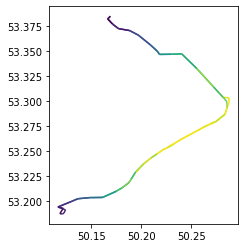

In [191]:
stop_seq_with_marix_gpd[stop_seq_with_marix_gpd['mr_id']==1].plot('c')

In [192]:
stop_seq_with_marix_gpd['c'].sum()

117669.89077670035

In [193]:
stop_seq_with_marix_gpd.crs ='epsg:4326'
stop_seq_with_marix_gpd.groupby(['mr_name','tt_name']).apply(lambda x: x.to_file(fr"./done_oct/res/{x.name}_pssptk.json", index=False, driver="GeoJSON", encoding='utf-8'))


""


In [ ]:
matrix_all_s.crs='epsg:4326'
matrix_all_s.groupby(['site_id_x']).apply(lambda x: x.to_file(fr"./done_oct/res/{x.name}_video.json", index=False, driver="GeoJSON", encoding='utf-8'))


## Анализируем сайты, которые не вошли в матрицу, смотрим, не вошли ли они в видеоаналитику

In [95]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [96]:
#считали остановки из Яндекса
Yandex_stop=pd.read_csv(path+'videoanal/Yandex_STOPS.csv')

In [97]:
#считали данные видеоаналитики
video_data=pd.read_csv(path+'videoanal/videoanal_by_stops.csv',encoding='utf-8', sep=";")
video_data=video_data[video_data['Широта'].notna()]
video_data=video_data[video_data['Перевозчик']=='Рейс'] #выбрали только частника
video_data=video_data.fillna(0)
video_data['Открытие двери']=video_data['Открытие двери'].astype(str)

In [98]:
video_data2=video_data[video_data['Открытие двери'].str.startswith('7:')]\
    .append(video_data[video_data['Открытие двери'].str.startswith('8:')])\
    .append(video_data[video_data['Открытие двери'].str.startswith('9:')])

In [99]:
video_stops=video_data[['ID остановки (Яндекс)','Широта','Долгота']].drop_duplicates()
video_stops=video_stops.merge(Yandex_stop, left_on='ID остановки (Яндекс)', right_on='stop_id', how='left')
video_stops.loc[video_stops['stop_id'].notna(),'Широта']=video_stops.loc[video_stops['stop_id'].notna(),'latitude']
video_stops.loc[video_stops['stop_id'].notna(),'Долгота']=video_stops.loc[video_stops['stop_id'].notna(),'longitude']
video_stops=video_stops[['ID остановки (Яндекс)','Широта','Долгота']].drop_duplicates()

In [100]:
#сформировали геослой из остановок
video_stops_gpd=gpd.GeoDataFrame(video_stops, \
                              geometry = [Point(xy) for xy in zip(video_stops['Долгота'], video_stops['Широта'])])
video_stops_gpd.crs='epsg:4326'

In [101]:
#сформировали геослой из сайтов
sites_gpd = gpd.GeoDataFrame(sites_unic, \
                              geometry = [Point(xy) for xy in zip(sites_unic['ss_long'], sites_unic['ss_lat'])])
sites_gpd.crs='epsg:4326'

In [102]:
#привязали остановки к сайтам с буфером 200 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(200)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')
video_stops_gpd=gpd.sjoin(video_stops_gpd, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')
video_stops_gpd=video_stops_gpd.drop_duplicates(subset='ID остановки (Яндекс)')
video_stops_gpd=video_stops_gpd[['ID остановки (Яндекс)','geometry','site_id']]

In [103]:
#привязали остановки к сайтам с буфером 500 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(500)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')
video_stops_gpd=gpd.sjoin(video_stops_gpd, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')
video_stops_gpd=video_stops_gpd.drop_duplicates(subset='ID остановки (Яндекс)')
video_stops_gpd

,ID остановки (Яндекс),geometry,site_id_left,index_right,site_id_right,ss_lat,ss_long
0,1543169958,POINT (50.30971 53.30964),322.0,731.0,1331.0,53.305825,50.312362
48,2128066460,POINT (50.33756 53.30911),1326.0,738.0,1326.0,53.309642,50.337857
49,2128211035,POINT (50.33813 53.31018),1326.0,738.0,1326.0,53.309642,50.337857
50,2128213055,POINT (50.34065 53.31213),1325.0,738.0,1326.0,53.309642,50.337857
51,2128213145,POINT (50.34142 53.31173),1325.0,738.0,1326.0,53.309642,50.337857
...,...,...,...,...,...,...,...
11239,12035,POINT (50.38742 53.26467),NaN,667.0,1069.0,53.263214,50.384248
11240,12036,POINT (50.38947 53.26581),NaN,667.0,1069.0,53.263214,50.384248
11241,12037,POINT (50.38725 53.26785),NaN,685.0,1250.0,53.269570,50.385970
11242,12046,POINT (50.26957 53.23019),88.0,497.0,87.0,53.229054,50.267173


In [104]:
video_stops_gpd.loc[video_stops_gpd['site_id_left'].isna(),'site_id_left']=video_stops_gpd.loc[video_stops_gpd['site_id_left'].isna(),'site_id_right']

In [105]:
video_stops_gpd=video_stops_gpd[video_stops_gpd['site_id_left'].notna()]

In [106]:
video_stops_sites=video_stops_gpd[['ID остановки (Яндекс)','site_id_left']].drop_duplicates()

In [107]:
video_stops_sites=video_stops_sites.rename(columns={'site_id_left':'site'})

In [108]:
video_data2=video_data.merge(video_stops_sites,on='ID остановки (Яндекс)')

In [109]:
#выбрали только те сайты, которые не вошли в матрицу по валидациям
#video_data2=video_data2[~video_data2['site'].isin(matrix['site_id'].unique())]
#video_data2=video_data2[~video_data2['site'].isin(matrix['site_id_2'].unique())]

In [110]:
#cчитали частоту хождения по маршрутам
freq=pd.read_csv(path+'videoanal/freq2.csv',encoding='utf-8',sep=';')

In [111]:
freq=freq.fillna(0)

In [112]:
freq[0:3]

,site,freq
0,322,40
1,321,36
2,320,36


In [113]:
#перешли к входу среднему на одном рейсе
video_data2=pd.DataFrame(video_data2.groupby(['route_id','trip_id','site']).agg({'Вошло':np.mean}).reset_index())

In [114]:
#перешли к среднему выходу на одном рейсе автобусов перевозчика 'Рейс'
vyxod_reis=pd.DataFrame(video_data.groupby(['route_id','trip_id','ID остановки (Яндекс)']).agg({'Вышло':np.mean}).reset_index())

In [115]:
vyxod_reis=vyxod_reis.merge(video_stops_sites,on='ID остановки (Яндекс)', how='left')

In [116]:
#выбрали только те остановки,по которым будем размазывать выход (убрали те остановки, на которых у нас вход и там, где выход = 0)
#vyxod_reis=vyxod_reis[~vyxod_reis['site'].isin(video_data2['site'].unique())]
vyxod_reis=vyxod_reis[vyxod_reis['Вышло']>0]

In [117]:
vyxod_reis=pd.DataFrame(vyxod_reis.groupby(['trip_id','site']).agg({'Вышло':np.mean}).reset_index())

In [118]:
#считаем суммарный выход на одном направлении на одном маршруте:
vyxod_reis_group_trip_id=pd.DataFrame(vyxod_reis.groupby(['trip_id']).agg({'Вышло':np.sum}).reset_index())

In [119]:
#размазываем 
vyxod_reis=vyxod_reis.merge(vyxod_reis_group_trip_id, on ='trip_id',how='outer')
vyxod_reis['part']=vyxod_reis['Вышло_x']/vyxod_reis['Вышло_y']
vyxod_reis=vyxod_reis[['trip_id','site','part']]

In [120]:
video_data2=video_data2[['trip_id','site','Вошло']]

In [121]:
matrix_video=video_data2.merge(vyxod_reis, on ='trip_id', how='outer')

In [122]:
matrix_video['c']=matrix_video['Вошло']*matrix_video['part']

In [281]:
matrix_video[0:1]

,site_id,site_id_2,c
0,20,20,0


In [124]:
matrix_video=matrix_video.merge(freq,left_on ='site_x',right_on ='site', how='left')

In [125]:
matrix_video['c']=matrix_video['c']*matrix_video['freq']

In [126]:
matrix_video['c'].sum()

10997.424247454732

In [282]:
matrix_video[0:1]

,site_id,site_id_2,c
0,20,20,0


In [128]:
matrix_video=pd.DataFrame(matrix_video.groupby(['site_x','site_y']).agg({'c':np.sum}).reset_index())

In [129]:
matrix_video=matrix_video.rename(columns={'site_x':'site_id','site_y':'site_id_2'})

# Ура, дозаписываем данные видеоаналитики в данные по валидациям

In [130]:
matrix=pd.read_csv(path+'matrix_oct_new_sites.csv')
matrix=matrix[matrix['c']>0]
matrix=matrix[['site_id','site_id_2','c']]

In [131]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30107 entries, 0 to 30106
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   site_id    30107 non-null  int64
 1   site_id_2  30107 non-null  int64
 2   c          30107 non-null  int64
dtypes: int64(3)
memory usage: 940.8 KB


In [132]:
matrix_video['c']=matrix_video['c'].astype('int64')
matrix_video['site_id']=matrix_video['site_id'].astype('int64')
matrix_video['site_id_2']=matrix_video['site_id_2'].astype('int64')

In [133]:
matrix=matrix.append(matrix_video)

In [134]:
matrix=pd.DataFrame(matrix.groupby(['site_id','site_id_2']).agg({'c':np.sum}).reset_index())

In [135]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45945 entries, 0 to 45944
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   site_id    45945 non-null  int64
 1   site_id_2  45945 non-null  int64
 2   c          45945 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [136]:
matrix['site_id_2']=matrix['site_id_2'].astype('int64')

In [137]:
matrix.to_csv(path+'res/matrix_oct_new_sites_with_video.csv', index=False)

## Рассчитываем принадлежность сайта тому или иному транспортному району

In [138]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [139]:
sites_gpd = gpd.GeoDataFrame(sites_unic, \
                              geometry = [Point(xy) for xy in zip(sites_unic['ss_long'], sites_unic['ss_lat'])])
sites_gpd.crs='epsg:4326'

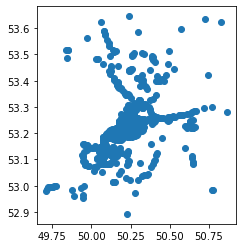

In [140]:
sites_gpd.plot()

In [141]:
transport_zone=gpd.read_file('557_zone.shp', encoding='utf-8')

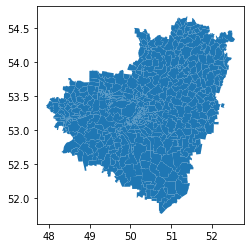

In [142]:
transport_zone.plot()

In [143]:
transport_zone.head()

,NO,geometry
0,1,"POLYGON ((49.74624 53.47745, 49.74695 53.48435..."
1,2,"POLYGON ((50.26787 53.17875, 50.24173 53.20126..."
2,3,"POLYGON ((50.34918 53.23681, 50.35777 53.22709..."
3,4,"POLYGON ((50.34862 53.32653, 50.33540 53.32700..."
4,5,"POLYGON ((49.22210 53.59736, 49.21382 53.55950..."


In [144]:
site_taz=gpd.sjoin(sites_gpd, transport_zone, how='left', op='within', lsuffix='left', rsuffix='right')

In [145]:
site_taz=site_taz.rename(columns={'NO':'Транспортные районы'})

In [146]:
site_taz['Транспортные районы'].unique()

array([232., 222., 231., 530., 294., 187., 224., 183., 181., 226., 274.,
       275., 225., 479., 193., 192., 227., 502., 223., 526., 295., 505.,
       520., 504., 523., 514., 159., 150., 151., 498., 515., 497.,  nan,
       522., 229., 160., 519., 189., 513., 517., 511., 516., 518., 476.,
       509., 119., 149., 512., 276., 510., 153., 548., 157., 543., 148.,
       552., 549., 555., 154., 553.,   2., 554., 156., 551., 158., 546.,
         3., 155., 544., 550., 547., 340., 161., 147., 145., 162., 143.,
       163., 338., 277., 541., 146., 336., 164., 334., 545., 144., 165.,
       542., 278., 535., 166., 296., 337., 540., 537., 335., 539., 482.,
       301., 333., 556., 300., 331., 299., 279., 538., 297., 303., 302.,
       298., 304., 332., 309., 308., 343., 351., 310., 344.,   1., 349.,
       355., 306., 305., 354., 141., 142., 350., 341., 484., 339.])

In [147]:
Pop=pd.read_csv(path+'Pop2025.csv', encoding='windows-1251', sep=";")

In [148]:
Pop

,Транспортные районы,Муниципалитет (нижний уровень),Город/ Муниципалитет,Факт_20_нас,Факт_20_раб,Инерция_25,Базовый_25,Б+_25,Ц+_25,Инерция_35,...,Б+_35,Ц+_35,Инерция_раб_25,Базовый_раб_25,Б+_раб_25,Ц+_раб_25,Инерция_раб_35,Базовый_раб_35,Б+_раб_35,Ц+_раб_35
0,1,Красноглинский район,городской округ Самара,8512,2888.555939,8615,8617,8329,8479,8235,...,6080,6584,2863.556561,2976.612721,2976.612721,3066.718597,2731.662723,3083.388383,3083.388383,3354.098505
1,2,Советский район,городской округ Самара,3301,25374.960880,3246,3247,3139,3195,3103,...,2291,2480,25155.350020,26148.509130,26148.509130,26940.057960,23996.708460,27086.496240,27086.496240,29464.590660
2,3,Кировский район,городской округ Самара,21013,11359.139230,20665,20756,20063,20432,19755,...,14772,16019,11260.830100,11705.419260,11705.419260,12059.757280,10742.162470,12125.310590,12125.310590,13189.868120
3,4,городское поселение Смышляевка,Волжский район,1710,230.549263,1618,1685,1629,1665,1626,...,1260,1380,228.553945,237.577490,237.577490,244.769264,218.026876,246.099758,246.099758,267.706409
4,5,сельское поселение Подстёпки,Ставропольский район,0,35.000000,0,0,0,0,0,...,0,0,34.697088,36.066965,36.066965,37.158758,33.098959,37.360742,37.360742,40.640877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,Ленинский район,городской округ Самара,47034,37695.420570,46256,46779,45216,46137,44220,...,33775,36840,37369.180710,38844.554420,38844.554420,40020.428800,35647.976830,40237.968150,40237.968150,43770.713270
553,554,Ленинский район,городской округ Самара,15308,8765.727037,15054,15367,14854,15337,14389,...,11308,12771,8689.862927,9032.947659,9032.947659,9306.386544,8289.612627,9356.973341,9356.973341,10178.481070
554,555,Железнодорожный район,городской округ Самара,1159,4145.548908,1140,1140,1102,1121,1089,...,804,871,4109.670723,4271.924753,4271.924753,4401.241382,3920.381553,4425.165243,4425.165243,4813.678422
555,556,городское поселение Смышляевка,Волжский район,8863,1197.825115,8384,13701,23709,23709,8423,...,111311,111311,1187.458383,1234.340462,1434.340462,1471.705528,1132.764704,1278.618147,1478.618147,1590.876102


In [149]:
from math import sqrt

In [150]:
Pop['koeff_pop_24']=Pop['Базовый_25']/Pop['Факт_20_нас']
Pop['koeff_work_24']=(Pop['Базовый_раб_25']/Pop['Факт_20_раб']).apply(np.sqrt)
Pop['koeff_pop_35']=Pop['Базовый_35']/Pop['Факт_20_нас']         
Pop['koeff_work_35']=(Pop['Базовый_раб_35']/Pop['Факт_20_раб']).apply(np.sqrt)
Pop['koeff_pop_30']=(Pop['Базовый_35']+Pop['Базовый_25'])/(2*Pop['Факт_20_нас'])     
Pop['koeff_work_30']=((Pop['Базовый_раб_35']+Pop['Базовый_раб_25'])/2/Pop['Факт_20_раб']).apply(np.sqrt)

In [151]:
Pop=Pop[['Транспортные районы','koeff_pop_24','koeff_pop_30','koeff_pop_35','koeff_work_24','koeff_work_30','koeff_work_35']]

In [152]:
site_taz=site_taz.merge(Pop,on='Транспортные районы')

In [153]:
site_koeff=site_taz[['site_id','Транспортные районы','koeff_pop_24','koeff_pop_30','koeff_pop_35','koeff_work_24','koeff_work_30','koeff_work_35']].drop_duplicates()

In [154]:
site_koeff_from=site_koeff.add_suffix('_from').rename(columns={'site_id_from':'site_id'})
site_koeff_to=site_koeff.add_suffix('_to').rename(columns={'site_id_to':'site_id_2'})
site_koeff_from=site_koeff_from[['site_id','Транспортные районы_from','koeff_pop_24_from','koeff_pop_30_from','koeff_pop_35_from']]
site_koeff_to=site_koeff_to[['site_id_2','Транспортные районы_to','koeff_work_24_to','koeff_work_30_to','koeff_work_35_to']]

In [155]:
matrix_taz=matrix.merge(site_koeff_from,on ='site_id', how='left')
matrix_taz=matrix_taz.merge(site_koeff_to,on ='site_id_2',how='left')

In [156]:
matrix_taz=pd.DataFrame(matrix_taz.groupby(['Транспортные районы_from','Транспортные районы_to']).agg({'c':np.sum}).reset_index())

In [157]:
matrix_taz=matrix_taz[matrix_taz['c']>0]

In [158]:
matrix_taz.to_csv(path+'matrix_taz.csv')

In [159]:
matrix['c']=matrix['c'].astype('float')

In [160]:
matrix_taz=matrix_taz.sort_values(by='c', ascending=False)

In [161]:
matrix_taz=matrix_taz.merge(transport_zone,left_on='Транспортные районы_from',right_on='NO')

In [162]:
matrix_taz=matrix_taz.merge(transport_zone,left_on='Транспортные районы_to',right_on='NO')

In [163]:
top=matrix_taz

In [164]:
top=top[top['c']>0]

In [165]:
top

,Транспортные районы_from,Транспортные районы_to,c,NO_x,geometry_x,NO_y,geometry_y
0,162.0,162.0,3810,162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183...",162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183..."
1,145.0,162.0,877,145,"POLYGON ((50.26088 53.22110, 50.24020 53.23733...",162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183..."
2,156.0,162.0,765,156,"POLYGON ((50.18668 53.21674, 50.18854 53.21524...",162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183..."
3,547.0,162.0,587,547,"POLYGON ((50.23523 53.20685, 50.22430 53.21554...",162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183..."
4,154.0,162.0,564,154,"POLYGON ((50.19259 53.17963, 50.19143 53.19206...",162,"POLYGON ((50.21574 53.26130, 50.22296 53.25183..."
...,...,...,...,...,...,...,...
2200,517.0,511.0,2,517,"POLYGON ((50.16701 53.13520, 50.17396 53.13309...",511,"POLYGON ((50.07795 53.15808, 50.07990 53.15794..."
2201,510.0,511.0,2,510,"POLYGON ((50.10204 53.16884, 50.09640 53.15850...",511,"POLYGON ((50.07795 53.15808, 50.07990 53.15794..."
2202,511.0,511.0,5,511,"POLYGON ((50.07795 53.15808, 50.07990 53.15794...",511,"POLYGON ((50.07795 53.15808, 50.07990 53.15794..."
2203,516.0,511.0,3,516,"POLYGON ((50.14344 53.13399, 50.14244 53.13135...",511,"POLYGON ((50.07795 53.15808, 50.07990 53.15794..."


In [166]:
top['Транспортные районы_from'].unique()

array([162., 145., 156., 547., 154., 146., 153., 161., 544., 147., 158.,
       550., 165., 553., 302., 155.,   2., 552.,   3., 554., 551., 549.,
       157., 546., 555., 538., 164., 543., 537., 299., 166., 541., 542.,
       539., 148., 163., 143., 151., 515., 509., 517., 301., 303., 300.,
       548., 310., 522., 149., 519., 510., 540., 309., 545., 229., 160.,
       150., 512., 513., 518., 159., 523., 305., 514., 144., 511., 516.,
       556., 277., 279., 278.,   1.])

In [167]:
top['Транспортные районы_to'].unique()

array([162., 146., 156., 161., 158., 145., 550.,   2., 147., 551.,   3.,
       552., 553., 155., 165., 154., 157., 547., 544., 554., 153., 538.,
       302., 555., 164., 546., 166., 537., 549., 299., 539., 542., 301.,
       163., 143., 300., 541., 303., 540., 148., 310., 543., 515.,   1.,
       522., 229., 305., 309., 509., 151., 512., 510., 160., 149., 517.,
       545., 556., 278., 277., 340., 336., 337., 513., 518., 519., 548.,
       279., 150., 159., 339., 514., 535., 516., 523., 511.])

In [168]:
top_from=top[['Транспортные районы_from','Транспортные районы_to','geometry_x','geometry_y','c']]

In [169]:
top_from=top_from.rename(columns={'Транспортные районы_from':'zid_from','Транспортные районы_to':'zid_to'})

In [170]:
top_from.to_csv(path+'validation_taz.csv')

In [171]:
top_from=gpd.GeoDataFrame(top_from, geometry = 'geometry_x')

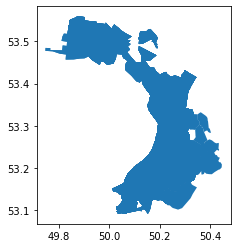

In [172]:
top_from.plot()

In [173]:
top_from.crs='epsg:4326'
top_from.to_file(path+"res/top_matrix_from.json", driver="GeoJSON", encoding='utf-8')

TypeError: data type not understood

In [ ]:
matrix_forecast=matrix.merge(site_koeff_from,on ='site_id', how='left')
matrix_forecast=matrix_forecast.merge(site_koeff_to,on ='site_id_2',how='left')

In [ ]:
matrix_forecast[0:10]

In [ ]:
matrix_forecast['2025']=matrix_forecast['c']*matrix_forecast['koeff_pop_24_from']*matrix_forecast['koeff_work_24_to']

In [ ]:
matrix_forecast['2030']=matrix_forecast['c']*matrix_forecast['koeff_pop_30_from']*matrix_forecast['koeff_work_30_to']

In [ ]:
matrix_forecast['2035']=matrix_forecast['c']*matrix_forecast['koeff_pop_35_from']*matrix_forecast['koeff_work_35_to']

In [ ]:
matrix_forecast=matrix_forecast[['site_id','site_id_2','c','2025','2030','2035']]

In [ ]:
#выделили общественно деловые районы:
raby=['2','3','4','13','23','143','157','160','510','516','543','551','552','553','555']

In [ ]:
matrix_forecast['udal']=1.0

In [ ]:
matrix_forecast.loc[matrix_forecast['site_id_2'].isin(raby),'udal']=0.9

In [ ]:
matrix_forecast['2025']=matrix_forecast['2025']*matrix_forecast['udal']
matrix_forecast['2030']=matrix_forecast['2030']*matrix_forecast['udal']
matrix_forecast['2035']=matrix_forecast['2035']*matrix_forecast['udal']

In [ ]:
matrix_forecast.to_csv(path+'res/matrix_forecast.csv')

In [ ]:
matrix_forecast['2035'].sum()

In [ ]:
matrix_forecast['2030'].sum()

In [ ]:
matrix_forecast['2025'].sum()

# ПРИВЯЗЫВАЕМ остановки яндекса к сайтам

In [ ]:
sites_unic=pd.read_csv(path+'sites_coordinate.csv', sep = ';', encoding='utf-8')

In [ ]:
stops_Yandex=pd.read_csv(path+'videoanal/stop_seq_from_Ya.csv',sep=',')

In [ ]:
#сформировали геослой из остановок
stops_Yandex=gpd.GeoDataFrame(stops_Yandex, \
                              geometry = [Point(xy) for xy in zip(stops_Yandex['longitude'], stops_Yandex['latitude'])])
stops_Yandex.crs='epsg:4326'

In [ ]:
sites_with_buff[0:2]

In [ ]:
stops_Yandex[0:2]

In [ ]:
#привязали остановки к сайтам с буфером 200 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(200)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')

In [ ]:
stops_Yandex2=gpd.sjoin(stops_Yandex, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')

In [ ]:
stops_Yandex2=stops_Yandex2[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id','geometry']]

In [ ]:
stops_Yandex2=stops_Yandex2.drop_duplicates(subset=['stop_id','route_id','trip_id'])

In [ ]:
#привязали остановки к сайтам с буфером 500 метров
sites_with_buff = sites_gpd.to_crs('epsg:32640')
sites_with_buff.geometry = sites_with_buff.geometry.buffer(500)
sites_with_buff = sites_with_buff.to_crs('epsg:4326')
stops_Yandex=gpd.sjoin(stops_Yandex2, sites_with_buff, how='left', op='within', lsuffix='left', rsuffix='right')

In [ ]:
stops_Yandex=stops_Yandex[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id_left','site_id_right','geometry']]

In [ ]:
stops_Yandex=stops_Yandex.drop_duplicates(subset=['stop_id','route_id','trip_id'])

In [ ]:
stops_Yandex.loc[stops_Yandex['site_id_left'].isna(),'site_id_left']=stops_Yandex.loc[stops_Yandex['site_id_left'].isna(),'site_id_right']

In [ ]:
stops_Yandex[['route_id','trip_id','stop_id','stop_sequence','latitude','longitude','site_id_left']].to_csv(path+'videoanal/Yandex_stop_with_site.csv')

In [ ]:
# Расчёт растояния между координатами
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 * 1000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
stops_seq=pd.read_csv(path+'stop_seq_v3.csv',sep=';',encoding='windows-1251')

In [ ]:
stops_seq['ss_lat_1']=stops_seq.groupby(['mr_id','rl_id'])['ss_lat'].shift(-1)

In [ ]:
stops_seq['ss_long_1']=stops_seq.groupby(['mr_id','rl_id'])['ss_long'].shift(-1)

In [ ]:
stops_seq['len'] = stops_seq.apply(lambda row: haversine(row.ss_long, row.ss_lat, row.ss_long_1, row.ss_lat_1), axis = 1)

In [ ]:
stops_seq.to_csv(path+'stop_seq_v4.csv')

## Визаулизация матрицы

In [ ]:
matrix[0:1]

In [ ]:
site=pd.read_csv('./done_oct/res/sites_coordinate.csv',sep=';')

In [ ]:
site[0:1]

In [ ]:
matrix_all_s=matrix.merge(site,on='site_id',how='left')
matrix_all_s=matrix_all_s.merge(site,left_on='site_id_2',right_on='site_id',how='left')
matrix_all_s=matrix_all_s[['site_id_x','site_id_2','c','ss_lat_x','ss_long_x','ss_lat_y','ss_long_y']]
matrix_all_s.groupby(['site_id_2']).agg({'c':np.sum}).sort_values(by='c', ascending=False)[0:10]

In [ ]:
matrix_all_s= gpd.GeoDataFrame(matrix_all_s,  geometry = [Point(xy) for xy in zip(matrix_all_s['ss_long_y'], matrix_all_s['ss_lat_y'])])
matrix_all_s.crs='epsg:4326'
matrix_all_s=matrix_all_s[matrix_all_s['site_id_x'].isin(['262','54','201','348'])]
matrix_all_s.groupby(['site_id_x']).apply(lambda x: x.to_file(fr"./done_oct/res/{x.name}_video.json", index=False, driver="GeoJSON", encoding='utf-8'))
matrix_all2=matrix_all_s[matrix_all_s['site_id_2'].isin(['262','54','201','348'])]
matrix_all2=matrix_all2[['site_id_2','geometry']].drop_duplicates()
matrix_all2.to_file(fr"./done_oct/res/sites.json", index=False, driver="GeoJSON", encoding='utf-8')

In [ ]:
matrix_video[matrix_video['site_id_2']==579]['c'].sum()